### Intelligent Algorithmic Trading
# Paper Title

<hr>
For further details visit our <a href='https://github.com/achmand/ari5123_assignment' target="_blank">GitHub Repository</a>

### Table of Contents

## Introduction

### Importing Dependencies 

In [1]:
# importing libraries
import pandas as pd
from pathlib import Path
import lucrum.datareader as ldr
from ipywidgets import interactive
from collections import OrderedDict
from lucrum.algo import MACrossoverAlgo

# hide warnings
import warnings
warnings.filterwarnings('ignore')

### Importing Cryptocurrencies Datasets 

In [2]:
# set parameters for importing datasets
data_path = "data/"            # data is stored in data directory 
data_format = ".csv"           # file is saved as .csv format
data_source = "binance"        # Binance API will be used to download data
data_interval = "15m"          # we will be fetching 15m interval data
data_timezone = "Europe/Malta" # timezone used to convert the data timezone from source

# currency pairs which will be investigated in this study
# we will be investigating 6 different cryptocurrencies pairs 
# all of which are against USDT which is considered as a stable coin 
currency_pairs = [("BTCUSDT", "17 Aug, 2017", "1 Jun, 2019"), # Bitcoin/Tether    17-08-2017 to 01-06-2019
                  ("ETHUSDT", "17 Aug, 2017", "1 Jun, 2019"), # Ethereum/Tether   17-08-2017 to 01-06-2019
                  ("XRPUSDT", "4 May, 2018", "1 Jun, 2019"), # Zerps/Tether       04-05-2018 to 01-06-2019
                  ("LTCUSDT", "13 Dec, 2017", "1 Jun, 2019"), # Litcoin/Tether    13-12-2017 to 01-06-2019
                  ("EOSUSDT", "28 May, 2018", "1 Jun, 2019"), # EOS/Tether        28-05-2018 to 01-06-2019
                  ("XLMUSDT", "31 May, 2018", "1 Jun, 2019")] # Stellar/Tether    31-05-2018 to 01-06-2019

# create an ordered dictionary to hold all the data
pairs_dict = OrderedDict()

# check if data exists as .csv, if not found in data path, download the 15m data from Binance API 
# a new module was created in the lucrum library to access API's such as Binance 

# loop in each pair 
for pair in currency_pairs:
    
    # get attributes from pair tuple 
    tmp_pair = pair[0]   # get pair
    tmp_start = pair[1]  # get start date
    tmp_end = pair[2]    # get end date 
    
    # get path from the attributes in the tuple 
    tmp_path = "{0}{1}{2}".format(data_path, tmp_pair, data_format)
    my_file = Path(tmp_path)
    
    # check if path exists 
    if my_file.is_file(): # file exists
        print("{0} file existed, retrieving data from file.".format(tmp_pair))
    
        # load data from path 
        price_history = pd.read_csv(tmp_path)
                
        # convert datetime types
        price_history["open_time"] = pd.to_datetime(price_history["open_time"].str.split("+").str[0])
        price_history["close_time"] = pd.to_datetime(price_history["close_time"].str.split("+").str[0])
        
        # add the dataframe to the dictionary
        pairs_dict[tmp_pair] = price_history
        print(price_history.dtypes)
        
    else: # file does not exist, download data from Binance API
        print("{0} file does not exist, downloading from {1}.".format(tmp_pair, data_source))
        
        # download from source provided, with the details provided
        price_history = ldr.get_data(source=data_source,
                                     symbols=tmp_pair,
                                     start=tmp_start, 
                                     end=tmp_end,
                                     interval=data_interval,
                                     timezone=data_timezone)
        
        # save the dataframe as csv file to the path 
        price_history.to_csv(tmp_path, 
                             index=None, 
                             header=True)
        
        
        # convert datetime types
        price_history["open_time"] = pd.to_datetime(price_history["open_time"].str.split("+").str[0])
        price_history["close_time"] = pd.to_datetime(price_history["close_time"].str.split("+").str[0])
        
        # add the dataframe to the dictionary
        pairs_dict[tmp_pair] = price_history
        print(price_history.dtypes)

BTCUSDT file existed, retrieving data from file.
open_time     datetime64[ns]
open                 float64
high                 float64
low                  float64
close                float64
close_time    datetime64[ns]
trades                 int64
volume               float64
dtype: object
ETHUSDT file existed, retrieving data from file.
open_time     datetime64[ns]
open                 float64
high                 float64
low                  float64
close                float64
close_time    datetime64[ns]
trades                 int64
volume               float64
dtype: object
XRPUSDT file existed, retrieving data from file.
open_time     datetime64[ns]
open                 float64
high                 float64
low                  float64
close                float64
close_time    datetime64[ns]
trades                 int64
volume               float64
dtype: object
LTCUSDT file existed, retrieving data from file.
open_time     datetime64[ns]
open                 float64
high    

### Exploring Cryptocurrencies Datasets 

## Baseline Strategies

### Buy and Hold Strategy

### Technical Indicators Strategies 

We decided to test out 4 different types of technical indicators. The following are the types of indicators we will be testing: 

1) <b>Trend Indicators</b> 
2) <b>Momentum Indicators</b>
3) <b>Volatility Indicators</b>
4) <b>Volume Indicators</b>

<i>NOTE: Sometimes trend and momentum indicators are use interchangeably, meaning some may refer to trend indicators as momentum indicators and some may refer to momentum indicators as trend indicators.</i>

<i>NOTE: Sometimes volatility and volume indicators are use interchangeably, meaning some may refer to volatility indicators as volume indicators and some may refer to volume indicators as volatility indicators.</i>

For each type we have chosen to investigate the following technical indicators:

1) <b>Trend Indicator</b>
- Short-Window EMA: Exponential Moving Average
- Long-Window EMA: Exponential Moving Average

2) <b>Momentum Indicator</b>
- RSI: Relative Strength Index

3) <b>Volatility Indicator</b>
- ATR: Average True Range

4) <b>Volume Indicator</b>
- OBV: On Balance Volume

So in total we will make use of 6 technical indicators. Now we will test these standard technical indicators strategies, each indicator with it’s own strategy.

#### Exponential Moving Average (Crossover) Strategy 

This strategy which will be applied is one of the most simplest strategies used when using an Exponential Moving Average (EMA) indicator or any other moving average indicator. We take the following positions based on the following rules:

<br>
<i>
If EMA_shortwindow > EMA_longwindow <br>
&ensp;then OpenLongPosition <br>
else <br>
&ensp;OpenShortPosition 
</i>


This strategy is usually referred to as the moving average crossover strategy. 

Tuning EMA strategy using brute force for BTCUSDT
[BEST] Lead(45) / Lag(75)

From 2017-08-17 06:00:00 to 2019-06-01 02:14:59.999
Profit/Loss: 237.27%
Maximum Loss (Min Cumulative Profit/Loss): -0.44%
Maximum Gain (Max Cumulative Profit/Loss): 253.16%
Total number of trades: 632

First 500 poistions taken for: BTCUSDT


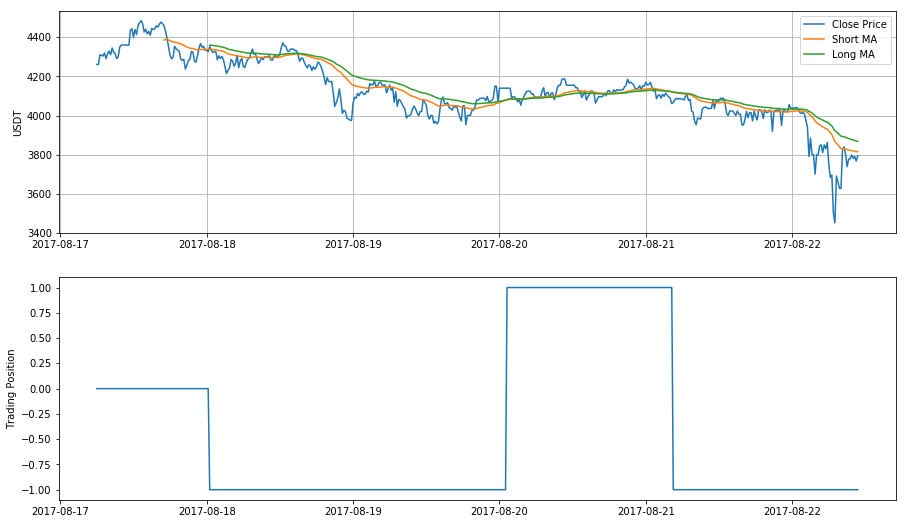

Last 500 poistions taken for: BTCUSDT


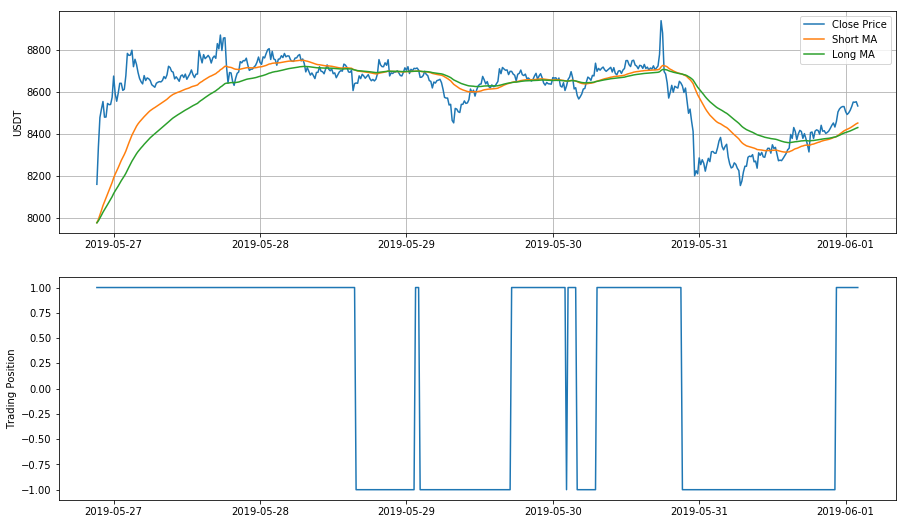

Performance for the whole date range for: BTCUSDT


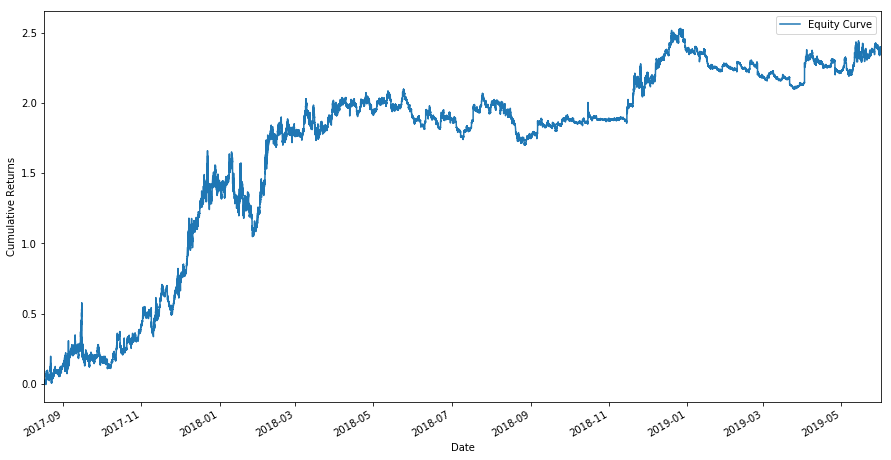

-------------------------------END--------------------------------------------------------
Tuning EMA strategy using brute force for ETHUSDT
[BEST] Lead(35) / Lag(75)

From 2017-08-17 06:00:00 to 2019-06-01 02:14:59.999
Profit/Loss: 359.96%
Maximum Loss (Min Cumulative Profit/Loss): -8.04%
Maximum Gain (Max Cumulative Profit/Loss): 370.15%
Total number of trades: 697

First 500 poistions taken for: ETHUSDT


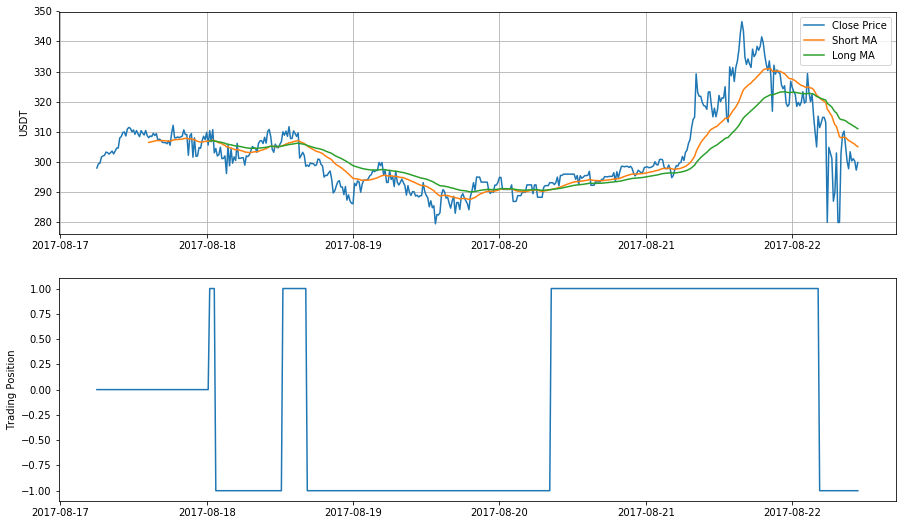

Last 500 poistions taken for: ETHUSDT


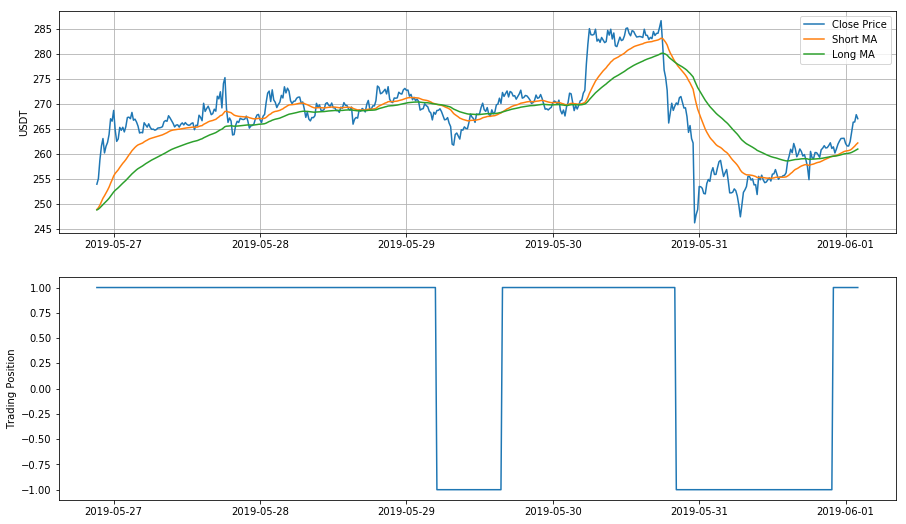

Performance for the whole date range for: ETHUSDT


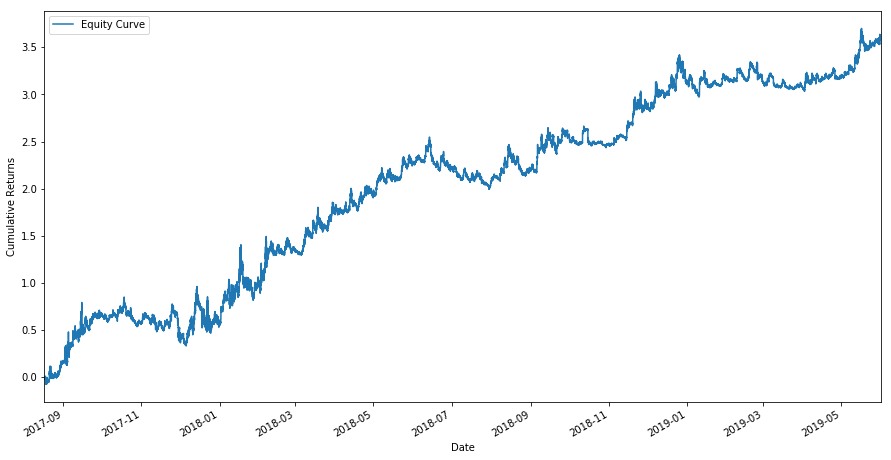

-------------------------------END--------------------------------------------------------
Tuning EMA strategy using brute force for XRPUSDT
[BEST] Lead(15) / Lag(35)

From 2018-05-04 10:00:00 to 2019-06-01 02:14:59.999
Profit/Loss: 134.33%
Maximum Loss (Min Cumulative Profit/Loss): -24.84%
Maximum Gain (Max Cumulative Profit/Loss): 151.72%
Total number of trades: 1022

First 500 poistions taken for: XRPUSDT


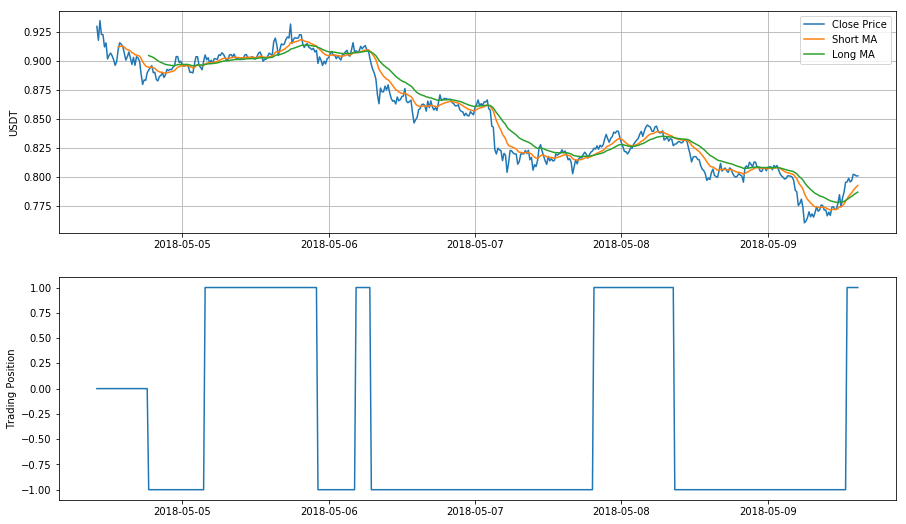

Last 500 poistions taken for: XRPUSDT


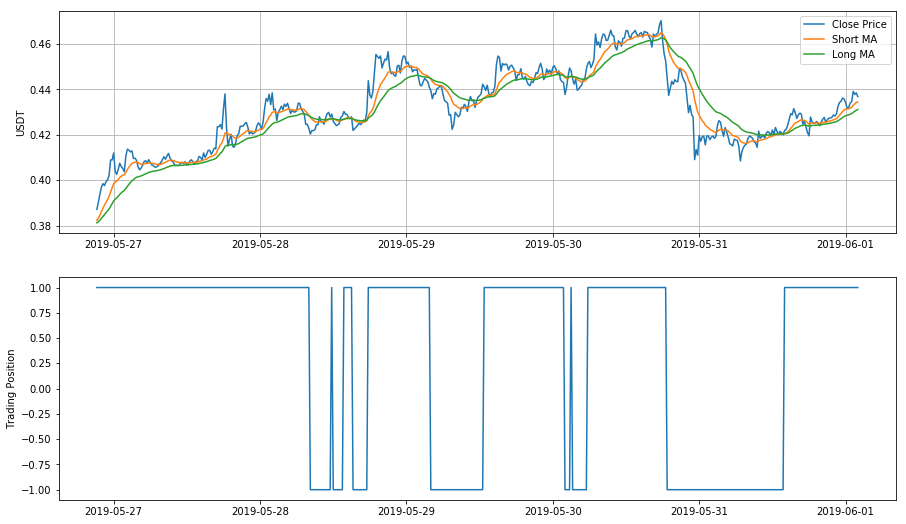

Performance for the whole date range for: XRPUSDT


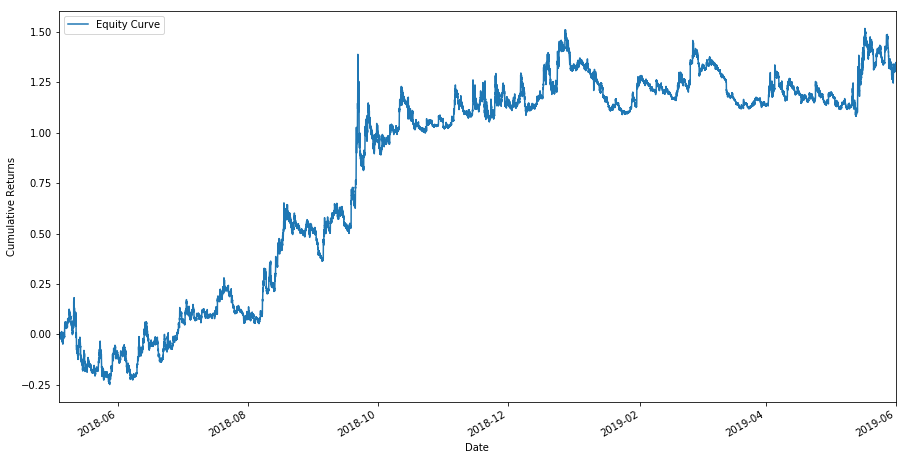

-------------------------------END--------------------------------------------------------
Tuning EMA strategy using brute force for LTCUSDT
[BEST] Lead(20) / Lag(35)

From 2017-12-13 04:30:00 to 2019-06-01 02:14:59.999
Profit/Loss: 172.5%
Maximum Loss (Min Cumulative Profit/Loss): -55.5%
Maximum Gain (Max Cumulative Profit/Loss): 185.43%
Total number of trades: 1180

First 500 poistions taken for: LTCUSDT


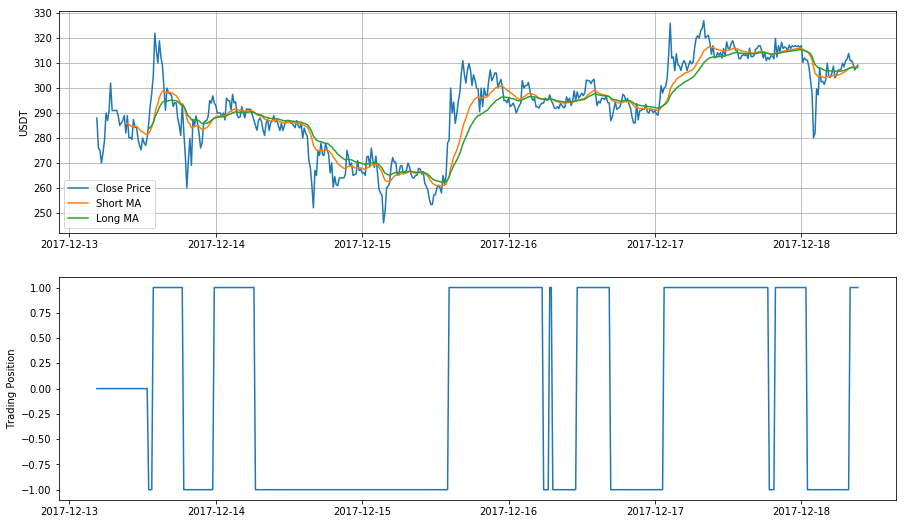

Last 500 poistions taken for: LTCUSDT


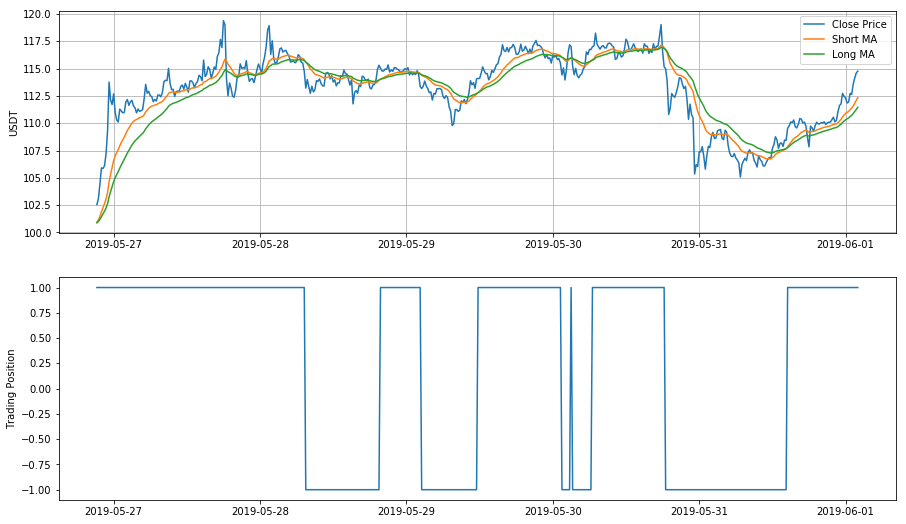

Performance for the whole date range for: LTCUSDT


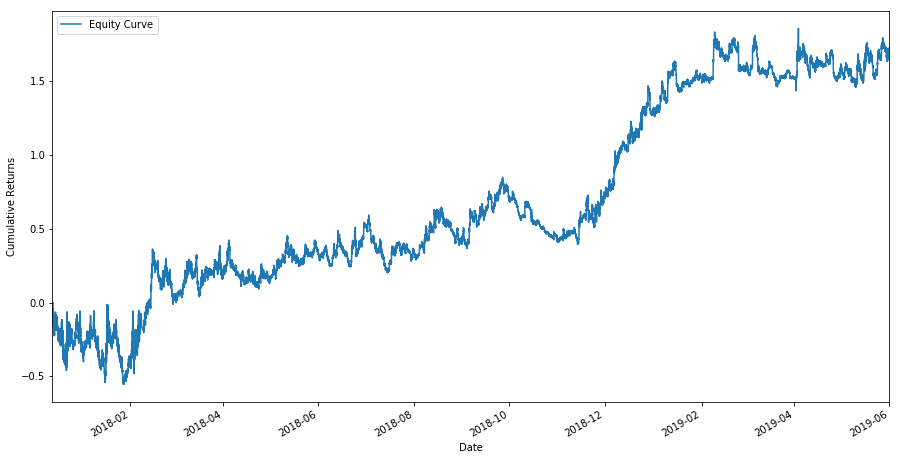

-------------------------------END--------------------------------------------------------
Tuning EMA strategy using brute force for EOSUSDT
[BEST] Lead(30) / Lag(35)

From 2018-05-28 07:00:00 to 2019-06-01 02:14:59.999
Profit/Loss: 141.58%
Maximum Loss (Min Cumulative Profit/Loss): -7.7%
Maximum Gain (Max Cumulative Profit/Loss): 150.71%
Total number of trades: 725

First 500 poistions taken for: EOSUSDT


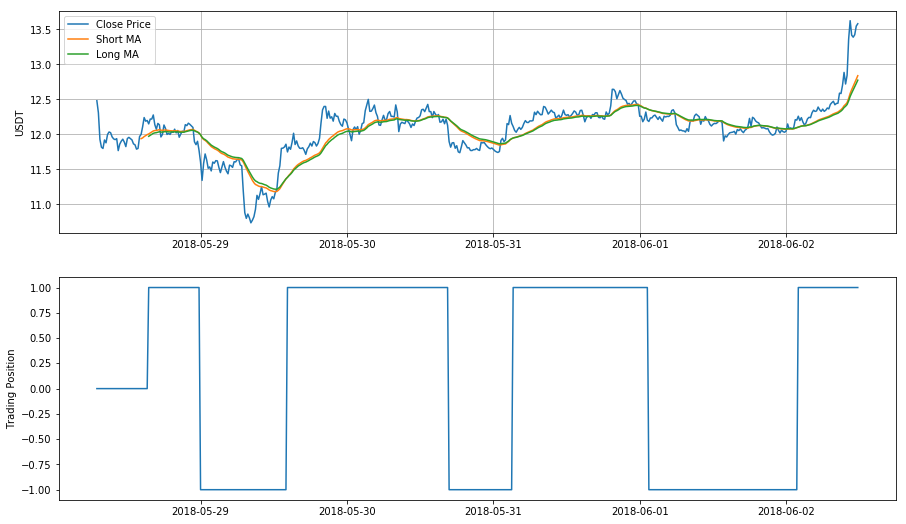

Last 500 poistions taken for: EOSUSDT


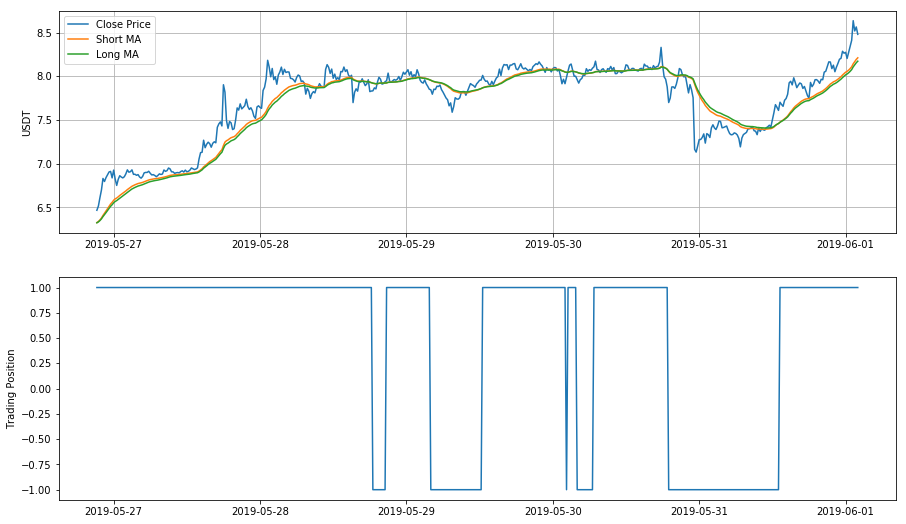

Performance for the whole date range for: EOSUSDT


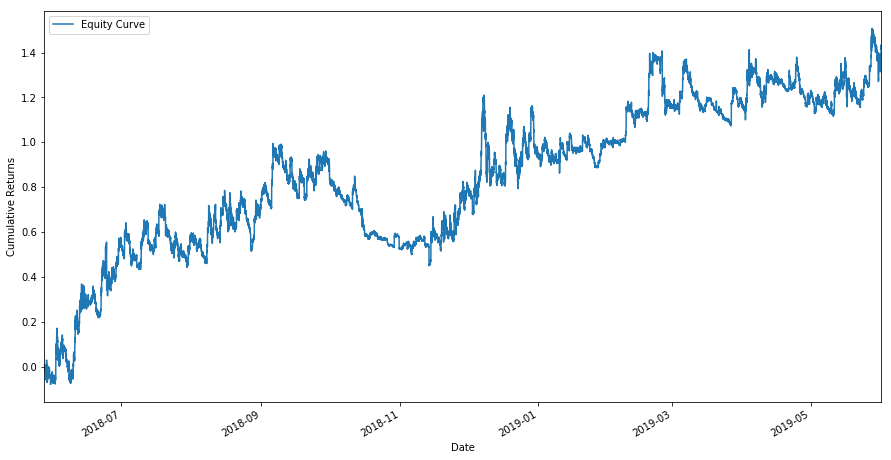

-------------------------------END--------------------------------------------------------
Tuning EMA strategy using brute force for XLMUSDT
[BEST] Lead(15) / Lag(25)

From 2018-05-31 11:30:00 to 2019-06-01 02:14:59.999
Profit/Loss: 107.1%
Maximum Loss (Min Cumulative Profit/Loss): -20.61%
Maximum Gain (Max Cumulative Profit/Loss): 123.53%
Total number of trades: 1123

First 500 poistions taken for: XLMUSDT


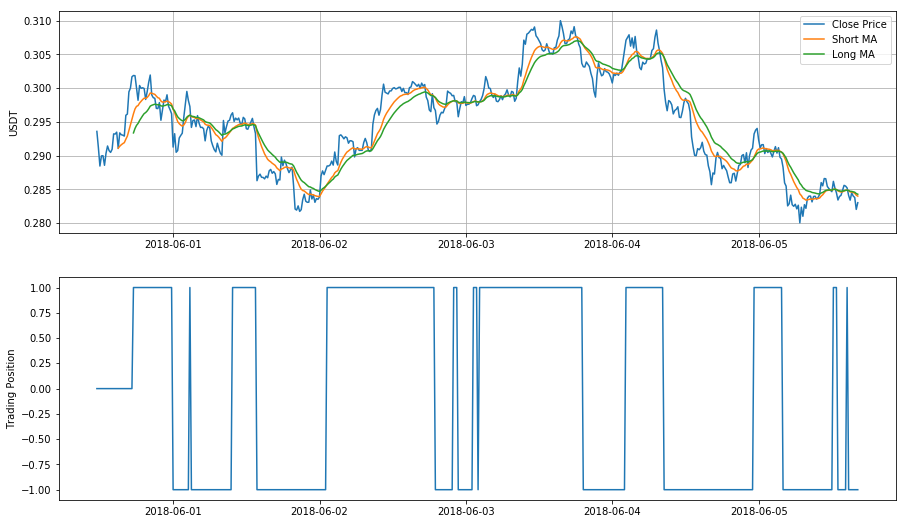

Last 500 poistions taken for: XLMUSDT


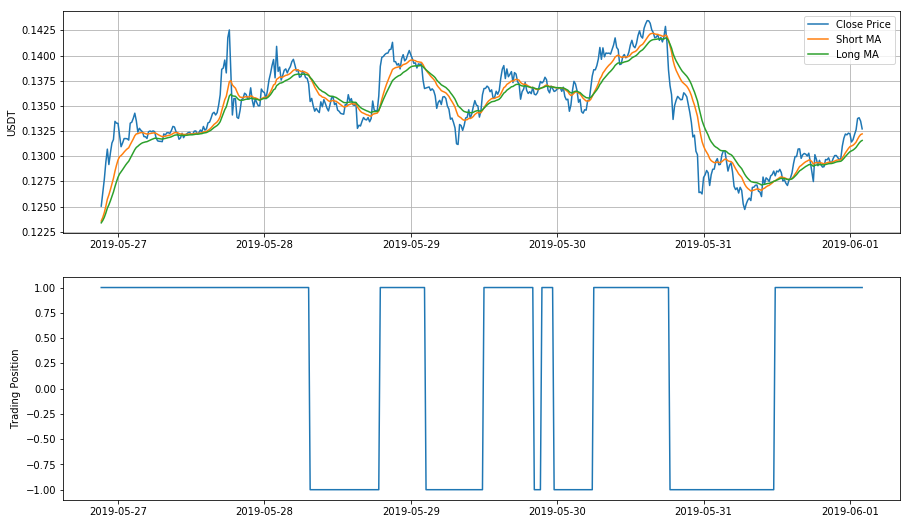

Performance for the whole date range for: XLMUSDT


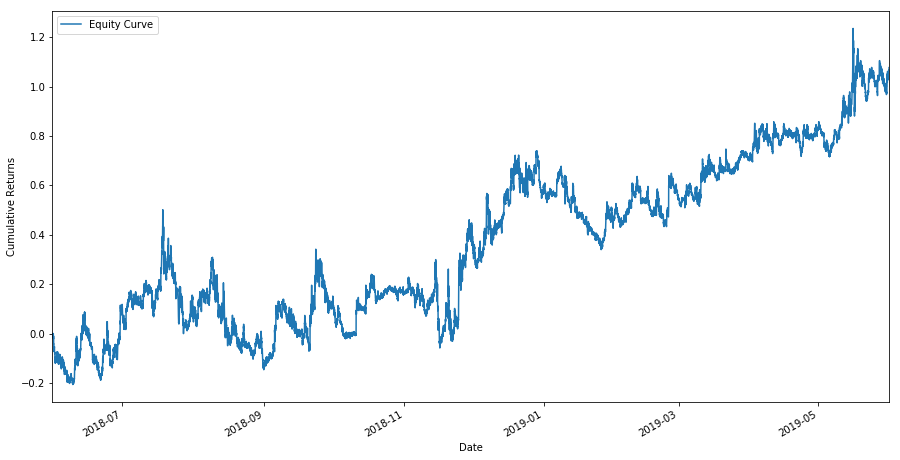

-------------------------------END--------------------------------------------------------


In [3]:
##################################################################
# Exponential Moving Average Crossover Strategy (BASELINE MODEL)
##################################################################

# we only show the first n and last n when plotting the positions 
# as the there are many points since we are using the 15m interval
position_plot_n = 500

# create a new instance for moving average strategy 
macrossover = MACrossoverAlgo()

# tune ema crossover method ('brute force method')
# for all the pairs found in the dataset 
for key, value in pairs_dict.items():
        
    # print the pair which is being tuned 
    print("Tuning EMA strategy using brute force for {}".format(key))

    # make copy of dataframe 
    current_pair = pairs_dict[key].copy()
    
    # setup initial values 
    best_lead = 0
    best_lag = 0
    best_pl = -float("inf") # set initial profit/loss to inf 
    
    # loop to try different windows for both lead and lag windows
    for i in range(5, 50, 5):     # lead window (steps of 5)
        for j in range(20, 80, 5): # lag window  (steps of 5)

            # lead window must be shorter than the lag window 
            if j > i:
                
                # note there are also some traders which use EMA for lead and SMA for lag window 
                # this MACrossoverAlgo can be used to test this strategy too, as it accepts the 
                # type of moving average to use 'ema' or 'sma', in our case we will use 'ema' for both
                macrossover.gen_features(data=current_pair,
                                         lead="ema", # we will use EMA moving average type for lead 
                                         lead_t=i,   # set window for short/lead 
                                         lag="ema",  # we will use EMA moving average type for lead 
                                         lag_t=j)    # set window for long/lag

                # generates positions based on crossover 
                # a value of '1' indicates a long position, while a value of '-1' indicates a short position 
                macrossover.gen_positions(data=current_pair)

                # evaluate positions by calculating profit and loss 
                macrossover.evaluate(data=current_pair)

                # check if we found a new best 
                if current_pair.cum_pl.iloc[-1] > best_pl:
                    best_lead = i
                    best_lag = j
                    best_pl = current_pair.cum_pl.iloc[-1]

    # show plots for best  
    macrossover.gen_features(data=current_pair,
                             lead="ema",         # we will use EMA moving average type for lead 
                             lead_t=best_lead,   # set window for short/lead 
                             lag="ema",          # we will use EMA moving average type for lead 
                             lag_t=best_lag)     # set window for long/
    
    # print statistics for strategy 
    macrossover.gen_positions(data=current_pair)
    macrossover.evaluate(data=current_pair) 

    # print best windows 
    print("[BEST] Lead({}) / Lag({})\n".format(best_lead, best_lag))
    
    # print performance
    macrossover.stats_perf(data=current_pair)
    
    # set open time as index for plots
    current_pair.set_index("open_time", inplace=True)
    # for the position plots we only show the first and last 500
    print("\nFirst 500 poistions taken for: {}".format(key))
    macrossover.plot_pos(data=current_pair.head(position_plot_n))
    print("Last 500 poistions taken for: {}".format(key))
    macrossover.plot_pos(data=current_pair.tail(position_plot_n))
    
    # plot performance for the whole range
    print("Performance for the whole date range for: {}".format(key))
    macrossover.plot_perf(data=current_pair)
    
    print("-------------------------------END--------------------------------------------------------")

In [4]:

display(pairs_dict["BTCUSDT"])

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
macrossover = MACrossoverAlgo()

display()

#test this shit out mate 
sym1 = "MSFT"
data = pdr.get_data_yahoo("MSFT", start="2016-01-01", end="2017-01-01")
data["price"] = data["Adj Close"]

,open_time,open,high,low,close,close_time,trades,volume
0,2017-08-17 06:00:00,4261.48,4280.56,4261.48,4261.48,2017-08-17 06:14:59.999,9,2.189061
1,2017-08-17 06:15:00,4261.48,4270.41,4261.32,4261.45,2017-08-17 06:29:59.999,40,9.119865
2,2017-08-17 06:30:00,4280.00,4310.07,4267.99,4310.07,2017-08-17 06:44:59.999,58,21.923552
3,2017-08-17 06:45:00,4310.07,4313.62,4291.37,4308.83,2017-08-17 06:59:59.999,64,13.948531
4,2017-08-17 07:00:00,4308.83,4328.69,4304.31,4304.31,2017-08-17 07:14:59.999,44,5.101153
5,2017-08-17 07:15:00,4320.00,4320.00,4312.14,4320.00,2017-08-17 07:29:59.999,29,15.947495
6,2017-08-17 07:30:00,4320.00,4320.00,4291.37,4291.37,2017-08-17 07:44:59.999,25,2.155453
7,2017-08-17 07:45:00,4297.04,4315.32,4297.04,4315.32,2017-08-17 07:59:59.999,4,0.030815
8,2017-08-17 08:00:00,4330.29,4330.29,4318.39,4330.00,2017-08-17 08:14:59.999,3,0.065364
9,2017-08-17 08:15:00,4309.37,4330.29,4309.37,4311.02,2017-08-17 08:29:59.999,11,3.500913


[*********************100%***********************]  1 of 1 downloaded


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'price'], dtype='object')


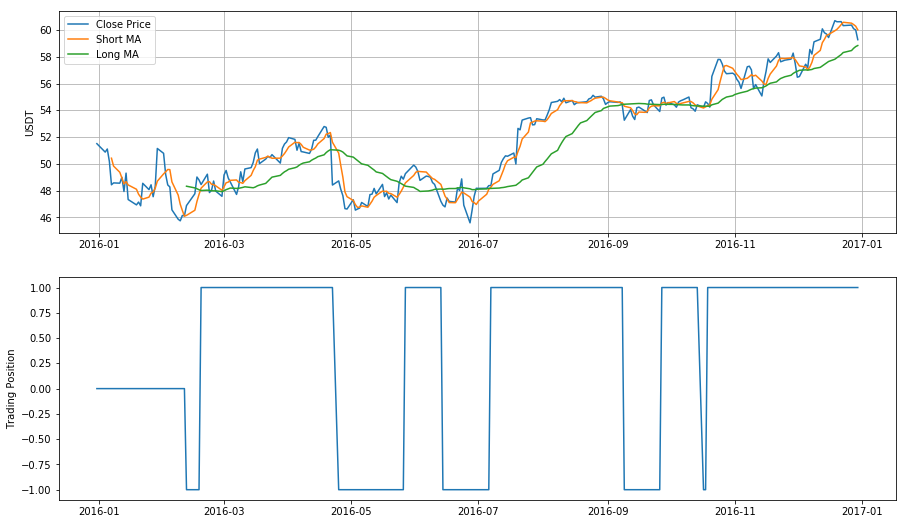

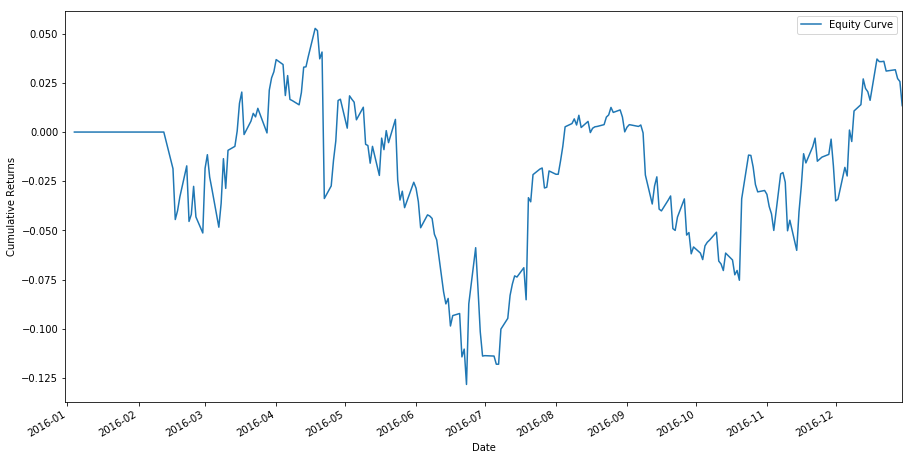

From test to test
Profit/Loss: 1.34%
Maximum Loss (Min Cumulative Profit/Loss): -12.82%
Maximum Gain (Max Cumulative Profit/Loss): 5.26%
Total number of trades: 10


,Open,High,Low,Close,Adj Close,Volume,price,close,open,high,...,lag_ma,long_signal,short_signal,long_position,short_position,position,logprices,log_returns,pl,cum_pl
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-23,63.45,63.54,62.80,63.24,60.32,12398000,60.32,60.32,63.45,63.54,...,58.311667,True,False,1,0,1,4.099664,-0.004961,-0.004961,0.030976
2016-12-27,63.21,64.07,63.21,63.28,60.36,11763200,60.36,60.36,63.21,64.07,...,58.459667,True,False,1,0,1,4.100327,0.000663,0.000663,0.031639
2016-12-28,63.40,63.40,62.83,62.99,60.09,14653300,60.09,60.09,63.40,63.40,...,58.627000,True,False,1,0,1,4.095843,-0.004483,-0.004483,0.027156
2016-12-29,62.86,63.20,62.73,62.90,60.00,10181600,60.00,60.00,62.86,63.20,...,58.755000,True,False,1,0,1,4.094345,-0.001499,-0.001499,0.025657
2016-12-30,62.96,62.99,62.03,62.14,59.27,25579900,59.27,59.27,62.96,62.99,...,58.834000,True,False,1,0,1,4.082103,-0.012241,-0.012241,0.013416


1.34


In [5]:
#display(data)

print(data.iloc[0].index)

data["close"] = data["Adj Close"]
data["open"] = data["Open"]
data["high"] = data["High"]
data["low"] = data["Low"]
data["volume"] = data["Volume"]

data["open_time"] = "test"

data["close_time"] = "test"

macrossover.gen_features(data=data,
                        lead="sma", # we will use EMA moving average type for lead 
                        lead_t=5,   # set window for short/lead 
                        lag="sma",  # we will use EMA moving average type for lead 
                        lag_t=30)    # set window for long/lag

macrossover.gen_positions(data=data)
macrossover.plot_pos(data=data)
macrossover.evaluate(data=data)
macrossover.plot_perf(data=data)
macrossover.stats_perf(data=data)

display(data.tail())
print(round(data.iloc[-1].cum_pl * 100, 2))